
# Project: Investigate a Dataset - TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>




<a id='intro'></a>
## Introduction

### Dataset Description 
 

### The used data set Includes all information of around 10,000 movies that are gathered from The Movie Database (TMDb), a number of characteristics about the movies are included in each row including user revenue and ratings.


### Here is a description of the table attributes down below:

>* *'id'* **and** *'imdb_id'* **refer to the movies unique id's as well as their imdb id's stored in the Movie Database.**
>* *'budget'* **and** *'revenue'* **show the financial information such as budget and revenue for each movie.**
>* *'cast', 'director',* **and** *'production_companies'* **contains the full names of actors, directors, production companies participated in the movie, respectively.**
>* *'homepage'* **provides the main page for the movie with all information needed.**
>* *'popularity', 'original_title', 'overview' , 'genres'*, **and** *'tagline'* **provides more details about the movie.**
>* *'runtime', 'release_date'* **and** *'release_year'* **gives information about the movie releasement details including runtime and specific dates.**
>* *'vote_count'* **and** *'vote_average'* **shows the average and the total number of votes for each movie.**
>* *'budget_adj'* **and** *'revenue_adj'* **show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.**
#### **Some columns, Such as ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.**


### Questions for the Analysis:

The main reason to conduct this analysis is to find out the answers to these main research questions:
***
* Research Question 1:  **Which movie is the most popular, in what year?**
***
* Research Question 2:  **Is there any relation between the movie popularity and revenue?**

In [1]:
# First step we need to import all scientific computing and visualization modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### Throughout this stage we are going to examine our selected dataset, by using the following methods:

* Validate data types.
* Handling missing values.
* Remove any outlier or duplicated values.
* Make necessary data Adjustments.

#### First step, is to load the data and print out a few lines, to have a general idea on the data in order to perform operations to inspect the data types and look for instances of missing data.

**Here I used 'read_csv' in order to read the dataset.**

In [3]:
# Use.read_csv() to load a CSV file as a pandas dataframe.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Here I used .shape to identify the dimension's index numbers representing the shape of the given array. Therefore, it shows that there are 10866 movies, and 21 columns.**

In [4]:
#Use .shape() to return the shape of an array,these numbers denote lengths of the corresponding array dimension. 
df.shape

(10866, 21)

**To get a descriptive statistics summary of the dataframe, I used the .describe() function. Also, to understand more about the data as if there are any outliers to identify any changes I have to make.**

In [5]:
#.describe() computes and displays summary statistics for a Python dataframe#
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* From this summary statistics, I can see that there are 0.65% of movies have gained popularity, as well as 75% have vote average around 6.6%, and most of these movies were released in 2015.

* The most popular movie has 32.9% and the least popular one has 0%. The majority of them are between 0.7 and 30 percent.
* Only 75 percent of the movies have budgets.
* Mostly, movies released in the year of 2011 and up have more vote count than the previous years movies.

**Here I was looking for missing values, by using info() function**

In [6]:
# .info() to print information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the table shown, I can see some attributes have missing values such as 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', and 'production_companies', which needs to be cleaned out in the next stage..


### Data Cleaning 

### To clean up the data I removed the *'actors'* and *'directors'* names as it seemed to be personal information and not needed in the analysis, as well as the extra movie explanation such as *'homepage', 'keywords', 'overview', 'production_companies'*, and *'tagline'*. In addition, I removed the *'budget_adj','revenue_adj', 'vote_count', 'imdb_id'* and *'release_year'* as the are alredy mentioned in the table in different way.
****

#### So in order to do that, I used drop() to remove the unwanted attributes 

In [7]:
#.drop() removes the specified row or column, in this case I removed unnecessary columns.
df.drop(['cast','homepage','director','keywords',
         'overview','tagline','budget_adj','revenue_adj','vote_count',
         'release_year','production_companies','imdb_id'], axis=1, inplace=True)

**Below you can see the table after dropping the attributes with the missing values, by using .head() function**

In [8]:
#.head() displays the first five rows of the dataframe by default, for instance, I asked for 20 rows.
df.head(20)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_average
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,7.3
5,281957,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,12/25/15,7.2
6,87101,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,6/23/15,5.8
7,286217,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,9/30/15,7.6
8,211672,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,6/17/15,6.5
9,150540,6.326804,175000000,853708609,Inside Out,94,Comedy|Animation|Family,6/9/15,8.0


**Here I used .hist() function, to visualise the data to have a clear look at it**

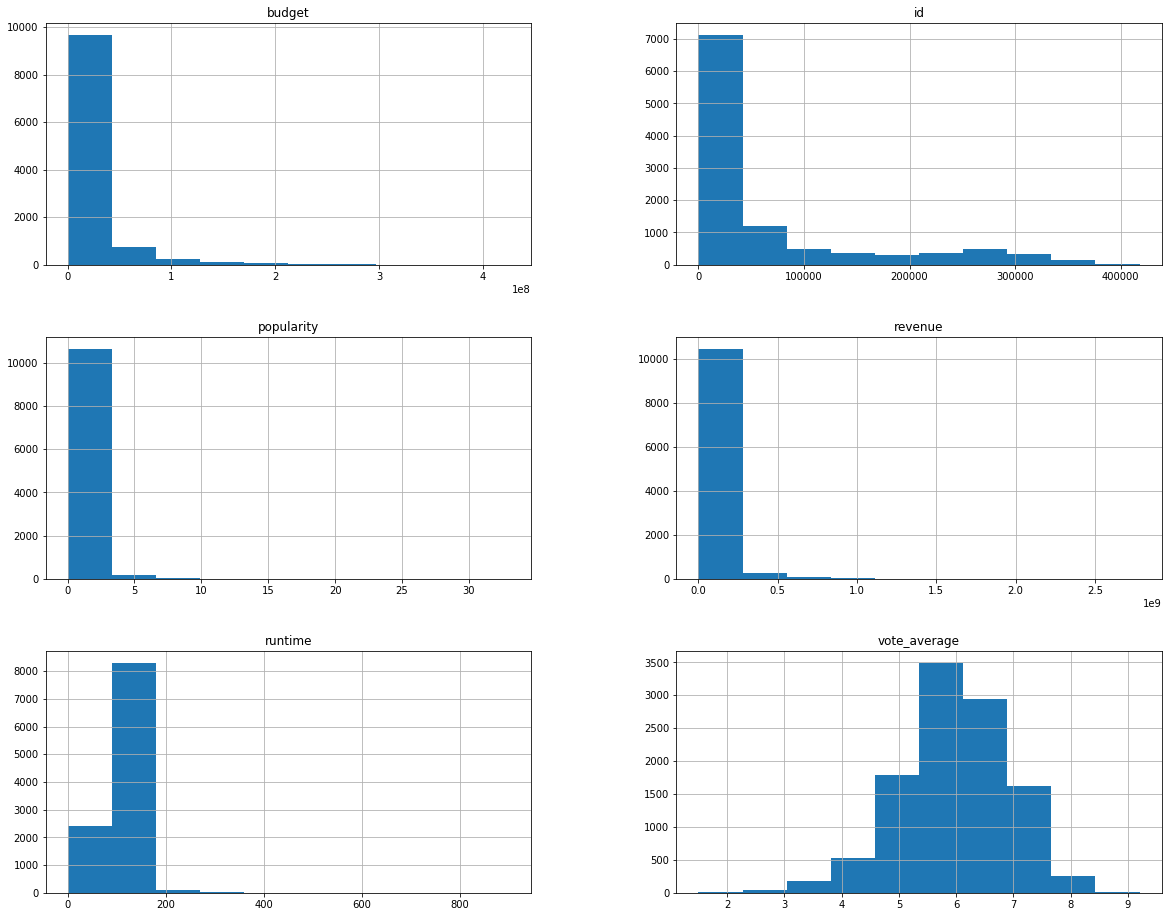

In [9]:
#.hist() to create histograms, in which it will use an array of numbers to create a histogram such as (20,16).
df.hist(figsize=(20,16));

* Most movies did not have revenue, majority of the reasons to have low popularity and budget.

**I used .info() to checkout the data if it need more adjustments to make**

In [10]:
# .info() to print information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 764.1+ KB


It shows 10866 values with some missing values in some of the table attributes, which I believe that I need to narrow it down for more clear results and replace or remove the missing values**

**To replace the missing values with the mean, I used fillna() function.**

In [11]:
#.fillna() to replace the NULL values with a specified value such as the mean.
df.fillna(df.mean(), inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 764.1+ KB


**Here I used .dropna() in order to remove any NA values**

In [12]:
#.dropna() to remove missing values.
df.dropna(inplace= True)

**To check the data after the adjustments have been made.**

In [13]:
# .info() to print information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 9 columns):
id                10843 non-null int64
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_average      10843 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 847.1+ KB


#### Here is the final data after trimming and cleaning the data.Therefore, the data is ready for EDA now. 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 :  Which movie is the most popular, in what year?

In [14]:
# .loc used to access a group of rows and columns by label such as 'popularity'
# .idxmax() used  returns a series with the index of the maximum value for each column.
df.loc[df['popularity'].idxmax()]

id                                                   135397
popularity                                          32.9858
budget                                            150000000
revenue                                          1513528810
original_title                               Jurassic World
runtime                                                 124
genres            Action|Adventure|Science Fiction|Thriller
release_date                                         6/9/15
vote_average                                            6.5
Name: 0, dtype: object

#### Regarding the table shown, the most popular movie is Jurassic World with 32.9% in 2015.

***

### Research Question 2 : Is there any relation between the movie popularity and revenue

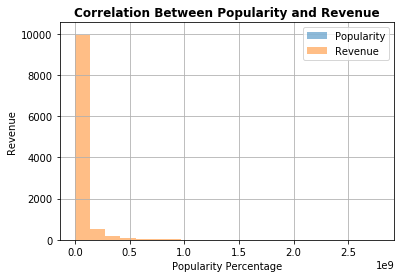

In [15]:
#.hist() to create histograms, in which it will use an array of numbers to create a histogram.
df.popularity.hist(alpha=0.5, bins=20, label='Popularity')
df.revenue.hist(alpha=0.5, bins=20, label='Revenue')
plt.title('Correlation Between Popularity and Revenue',fontweight ="bold")
plt.xlabel('Popularity Percentage')
plt.ylabel('Revenue')
plt.legend();

In [16]:
#return the mean for popularity
df.popularity.mean()

0.6474558849949276

In [17]:
#return the mean for revenue
df.revenue.mean()

39907792.38909896

#### Apparently there seem to be no correlation between popularity and revenue as it showed a huge differences in both values.
***

<a id='conclusions'></a>
## Conclusions


To conclude, The Movie Database (TMDb) data was used for this project. There are two main questions to find out Answers from this analysis. According to the findings, revenue has not had a significant effect on the movies popularity. It was expected that movies between years of 2011–2015 have most popularity because they are most recent movies. 


#### Limitation of Analysis:
Throughout the analysis I found some data deficiencies in data measurements. Therefore, It is not preferred to use any statistical test because most of the attributes is taken as a dependent variables.


